In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

In [106]:
df = pd.read_csv('./data_prepared.csv')

In [107]:
import pickle
file = open("./skill_dictionary",'rb')
skills_dict = pickle.load(file)
file.close()

In [108]:
df.head()

,Job_position,Company,Location,requirements,rating,experience,posting_frequency,min_sal,max_sal,avg_yearly_sal,...,api,js,cleaning,algorithms,architecture,information,jquery,bootstrap,react,apis
0,na,Gather Network,"Urban Estate Gurgaon, Haryana",blockchain,-99.0,na,1.0,240000.0,240000.0,240000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,na,Agile Placement,"Pune, Maharashtra",java spark python r,-99.0,Total work: 6 years,1.0,500000.0,1400000.0,950000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,na,Client of PlaceElements HR,"Thiruvananthapuram, Kerala",NaN,-99.0,Python: Algorithms: Statistics: 1 yearData Sci...,1.0,500000.0,1000000.0,750000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,na,Siemens Technology and Services Private Limited,"Pune, Maharashtra",c++,4.0,na,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,na,Teqlinx Software Solutions LLC,"Bengaluru, Karnataka",structures,-99.0,na,1.0,3000000.0,3000000.0,3000000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Lets start with salary

<AxesSubplot:xlabel='avg_yearly_sal', ylabel='Count'>

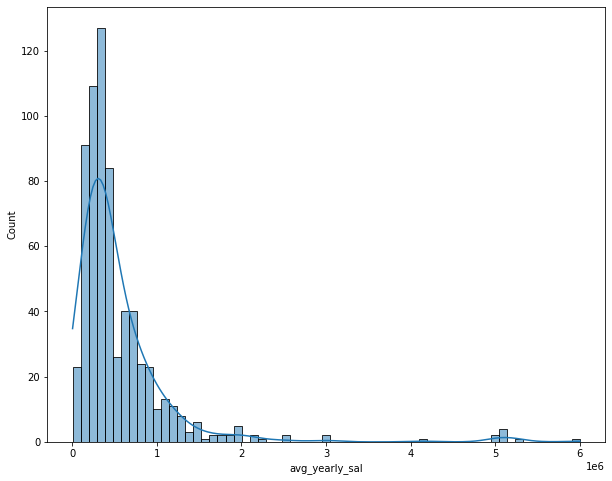

In [109]:
sns.histplot(df.loc[(df['avg_yearly_sal'] != 0)]['avg_yearly_sal'], kde=True)

Clearly the salary distribution is not uniform with most annual salries below Rs.1000000 and a few high salaries  

Lets calculate the typical salary one is likely to get out there annualy

In [110]:
# median not mean as distribution is skewed 
df['avg_yearly_sal'].median()

187338.0

Uhh.. not very soothing :( 

In [111]:
# removing values that fall below 5 and above 95 percentile
max_val = df.avg_yearly_sal.quantile(0.95)
min_val = df.avg_yearly_sal.quantile(0.05)
quantile_df = df[(df['avg_yearly_sal']>min_val) & (df['avg_yearly_sal']<max_val)]
len(quantile_df)

609

In [112]:
# lets try with iqr with replacing values Q1 that fall_below lower limit and Q2 that are above upper limit
Q1 = df.avg_yearly_sal.quantile(0.25)
Q3 = df.avg_yearly_sal.quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

quantile_df = df.copy()
quantile_df['avg_yearly_sal'] = np.where(df['avg_yearly_sal']>upper_limit,upper_limit,df['avg_yearly_sal'])
quantile_df['avg_yearly_sal'] = np.where(df['avg_yearly_sal']<lower_limit,lower_limit,df['avg_yearly_sal'])

<AxesSubplot:xlabel='avg_yearly_sal'>

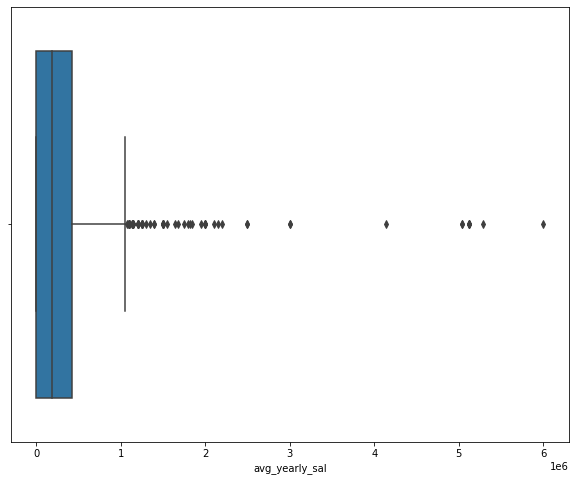

In [113]:
sns.boxplot(x= 'avg_yearly_sal', data=quantile_df)

This doesnt help either <br>
Lets now look at the boxplot of salary distribution of our orignal dataframe

<AxesSubplot:xlabel='avg_yearly_sal'>

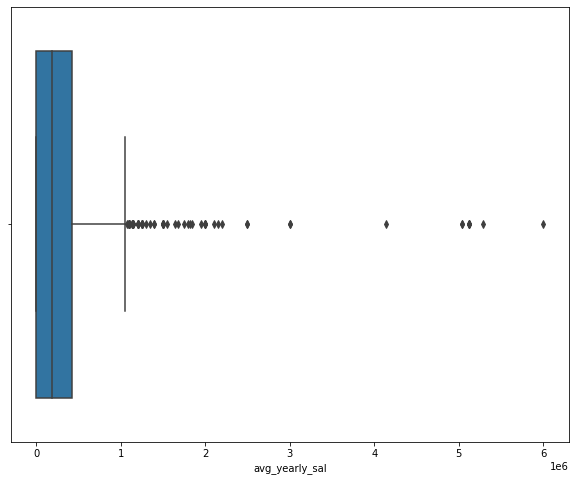

In [114]:
sns.boxplot(x='avg_yearly_sal', data=df)

In [115]:
len(df[df['avg_yearly_sal']>2e6])

16

Most of the salaries are below 2000000

Now lets continue with EDA <br>

In [117]:
corr = df[['Job_position', 'posting_frequency', 'avg_yearly_sal', 'rating', 'net_experience', 'bachelor', 'masters', 'secondary', 'job_title', 'jr',
       'senior', 'popular_profession', 'data scientist', 'deep learning', 'machine learning', 'software developer', 'software engineer',
       'job_openings', 'job_descr_len']].corr()

<AxesSubplot:>

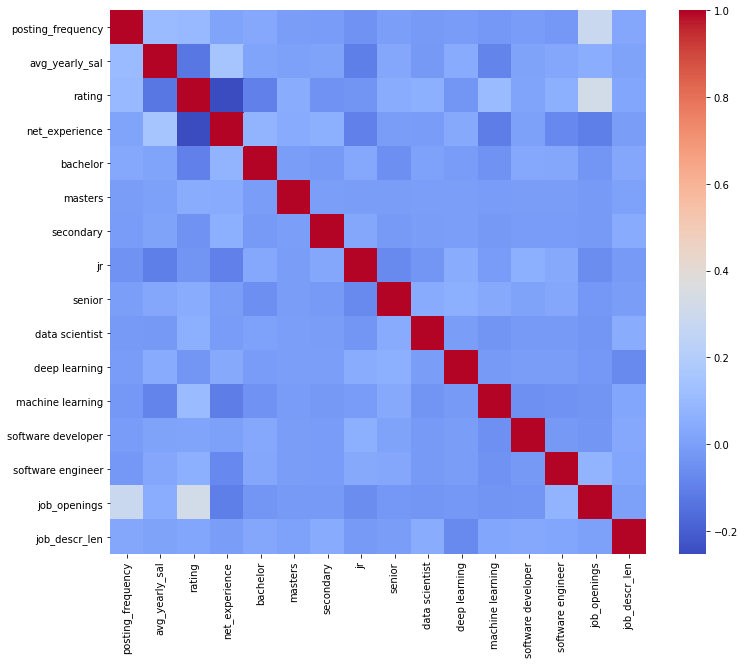

In [118]:
plt.figure(figsize=(12,10))
plt.figure
sns.heatmap(corr, cmap='coolwarm')

We can get a lot of information from this heatmap : <br>
(i) <b>Average year salary</b> and <b>net experience</b> are slightly positively correlated, which is expected, as companies offer higher annual salary to more experienced employees. <br>
(ii) <b>Average year salary</b> and <b>rating</b> are slightly negatively correlated, which is interesting, companies which higher ratings offer lower annual salary. <br>
(iii) There is also a slight <b>negative correlation</b> between <b>jr</b> title and <b>avg_year_salary</b> which is expected, but its intersting for <b>machine leaning</b> and <b>average annual salary</b> considering <b>ML</b> is such a hot topic in the job market around the world. <br>

most of other columns are weakly corelated 

In [231]:
palette = sns.color_palette("tab20",as_cmap=True)

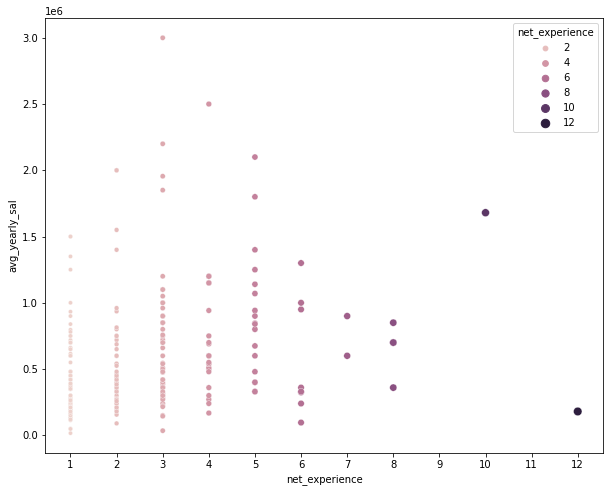

In [211]:
sns.scatterplot(x='net_experience', y='avg_yearly_sal', data=df[(df['avg_yearly_sal'] != 0) & (df['net_experience']>0)],hue=df[(df['avg_yearly_sal'] != 0) & (df['net_experience']>0)]['net_experience'], size='net_experience' )
plt.xticks(np.arange(1,13))
plt.show()

<AxesSubplot:xlabel='rating', ylabel='avg_yearly_sal'>

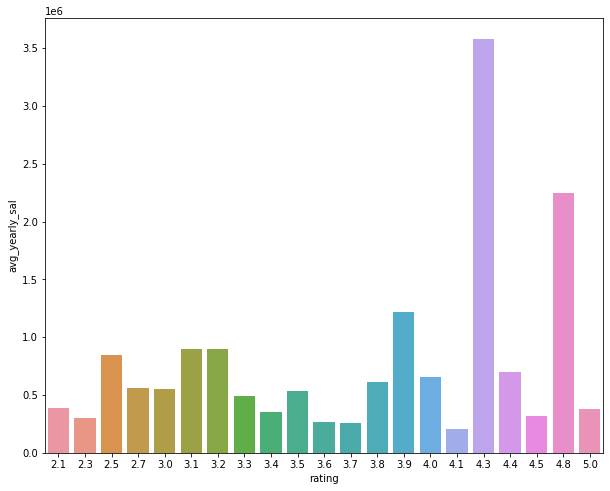

In [267]:
sns.barplot(x='rating', y='avg_yearly_sal', data=df[(df['avg_yearly_sal'] != 0) & (df['rating']>0)], ci=False)

Now, lets look at the effect of <b>seniority</b> on your salary <br>

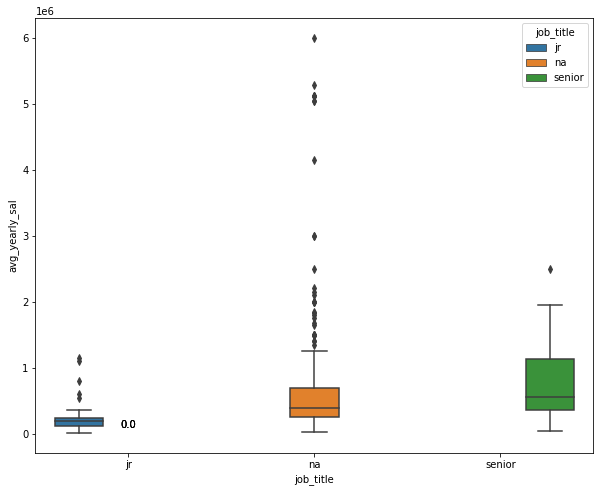

In [150]:
splot = sns.boxplot(x='job_title', y='avg_yearly_sal', data = df[df['avg_yearly_sal'] != 0], hue = 'job_title',)
# To display values above bars in bar plots for better analysis
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
plt.show()

As expected candidates for senior job titles are paid higher,  <br>
Also, it looks like most of the missing values are of type senior as it has a lot of outliers

From above barplot we can clearly see the negative correlation between ratings and average year salaries with a few exceptions

As observed from the correlation heatmap companies with higher job_openings tend to have higher posting frquency <br>
Except few companies, lets explore why

In [122]:
df.loc[(df['job_openings'] == 6) | (df['job_openings'] == 7)]['Company'].value_counts()

Shaw Academy                       7
ANI Calls India Private Limited    6
Name: Company, dtype: int64

Turns out these are some of the top companies out there, so they dont not need to work that much to catch applicants attention 

In [123]:
cat_df = df.select_dtypes(include='object')

lets look at the states for job postings

<AxesSubplot:xlabel='count', ylabel='State'>

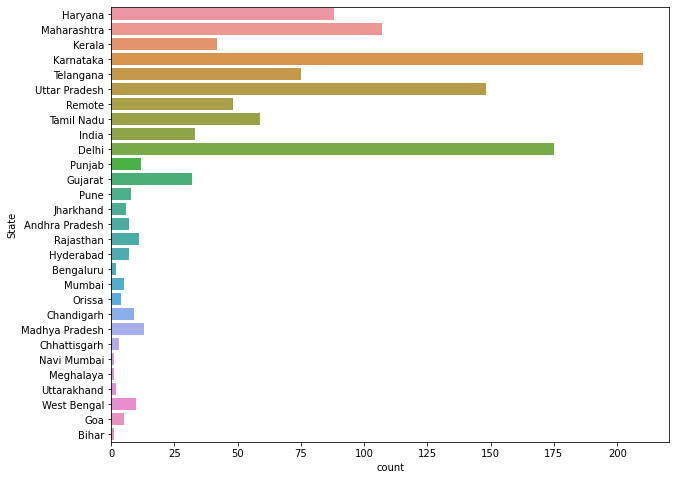

In [124]:
# Looks like Delhi has the most job openings 
sns.countplot(y="State", data = df)

Most job openings are from Karnataka, followed by Delhi

Lets now look at the avg year salary vs State wrt seniority 

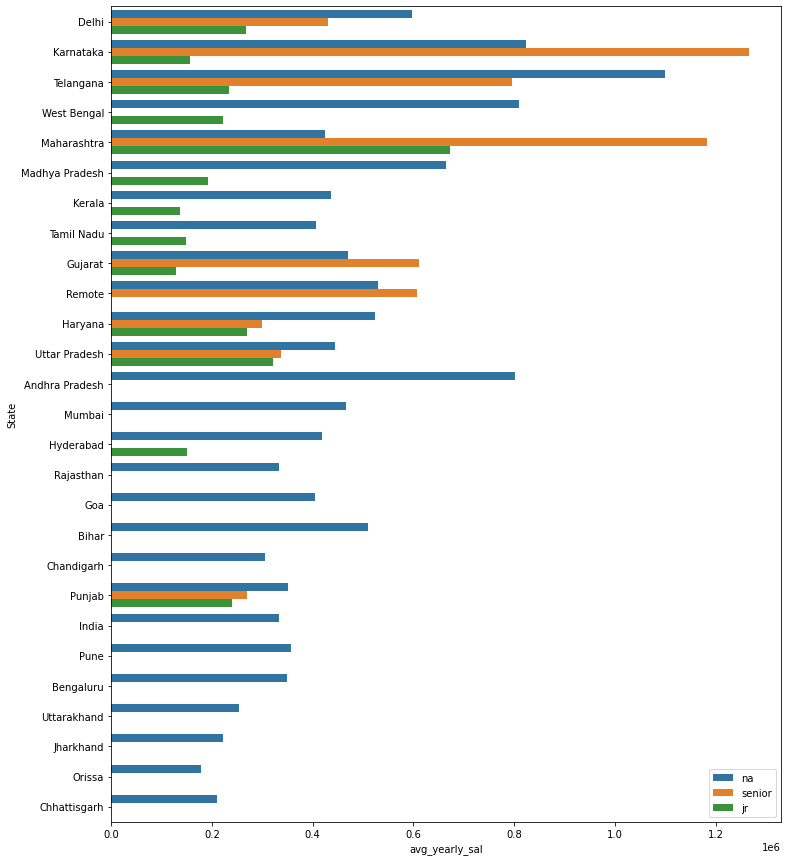

In [162]:
plt.figure(figsize=(12,15))
pd_df = df.sort_values('avg_yearly_sal',ascending=False).reset_index()
sns.barplot(x='avg_yearly_sal', y='State', data=pd_df.loc[(pd_df['avg_yearly_sal'] != 0)], ci=False, hue='job_title') 
plt.legend(loc='lower right')

lets now look at the skill dictionary that we generated during feature engineering <br>
It contains the <b>frequency</b> of a particular skill occuring in <b>requirements</b> column

In [126]:
skill_df = pd.DataFrame.from_dict(skills_dict, orient='index', columns=['Frequency'])

top_skills = skill_df.sort_values(by='Frequency', ascending=False)[:10]
top_skills['skills'] = top_skills.index
top_skills.set_index(np.arange(0,len(top_skills)), inplace=True)

In [127]:
skill_df['skills'] = skill_df.index
skill_df.set_index(np.arange(0, len(skill_df)), inplace=True)

In [128]:
skill_df['States'] = df['State']

Now lets look at top 10 skills in demand by companies 

In [129]:
top_10 = pd.pivot_table(df[(df['Job_position'] != 'na') & (df['avg_yearly_sal'] != 0)], index=['Company', 'Job_position', 'job_title'], values=['avg_yearly_sal'] )

In [130]:
top_10.reset_index(inplace=True)

In [131]:
top_10 = top_10.sort_values(by='avg_yearly_sal', ascending=False)[:10]

<AxesSubplot:xlabel='avg_yearly_sal', ylabel='Company'>

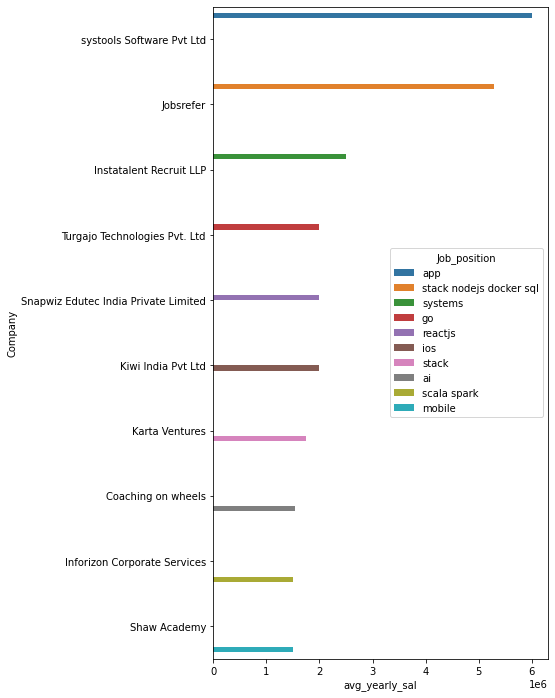

In [132]:
plt.figure(figsize=(6,12))
sns.barplot(y = 'Company', x='avg_yearly_sal', data=top_10, hue='Job_position')

<AxesSubplot:xlabel='Frequency', ylabel='skills'>

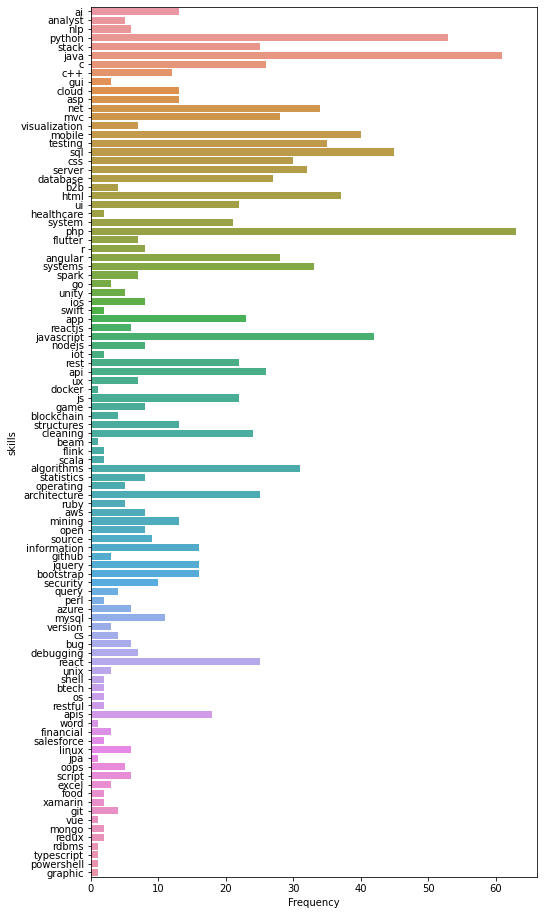

In [133]:
plt.figure(figsize=(8,16))
sns.barplot(x='Frequency', y='skills', data=skill_df)

Above is the plot of frequency of a particular skill ocurring in requirements column

Now lets look at it differently 

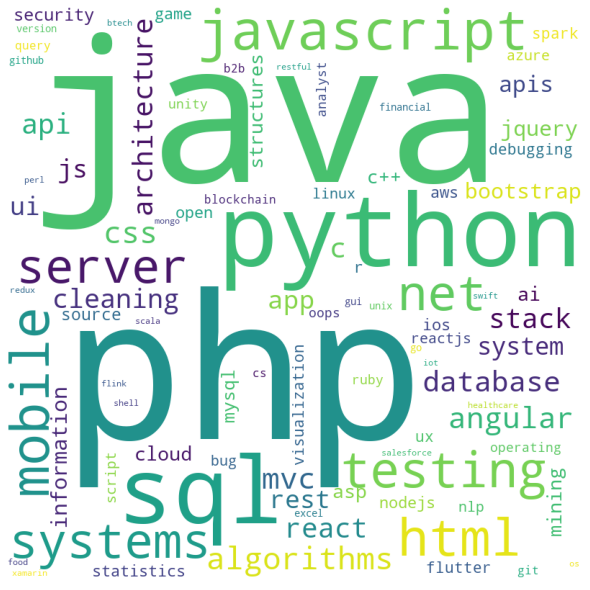

In [134]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(skills_dict) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

From the wordcloud we can see some of the trending skills in software industry<br>
Looks like most jobs are for front end, most popular framework is .net and the most asked for programming language is python, php and java     

Now lets look at <b>average salary</b> wrt to <b>job role</b>

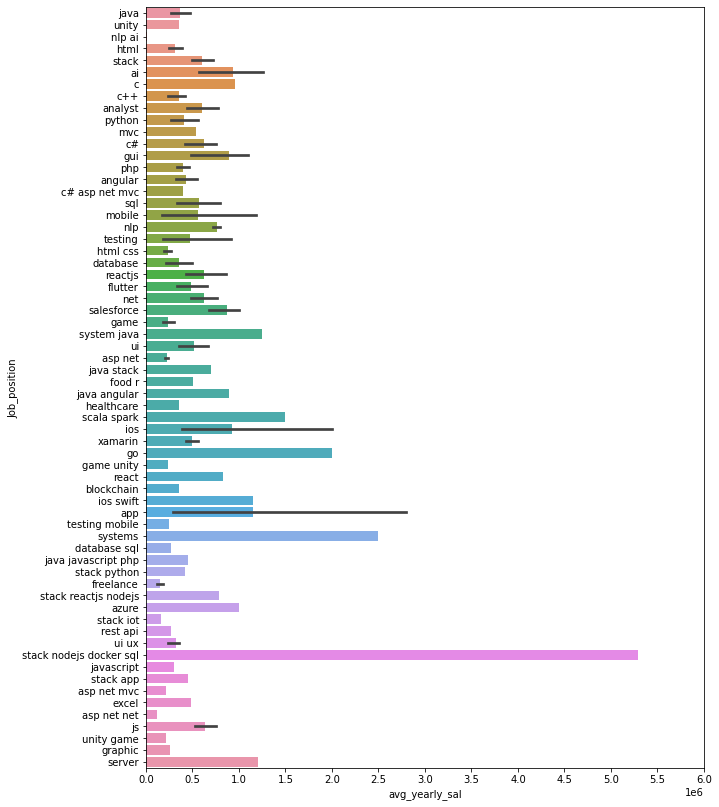

In [158]:
plt.figure(figsize = (10,14))
sns.barplot(y = 'Job_position', x = 'avg_yearly_sal', data =  df.loc[(df['avg_yearly_sal'] != 0) & (df['Job_position'] != 'na')])
plt.xticks([0, 0.5e6, 1e6, 1.5e6, 2e6, 2.5e6, 3e6, 3.5e6, 4e6, 4.5e6, 5e6, 5.5e6, 6e6])
plt.show()

(i)   Most salaries are below Rs.50000 <br>
(ii)  The highest offered salary is of Rs.5285450 by Jobsrefer<br> 
(iii) A Company even pays an annual salary of just Rs. 6500 !!

In [136]:
df.iloc[df['avg_yearly_sal'].argmax()][['Company', 'avg_yearly_sal']]

Company           systools Software Pvt Ltd
avg_yearly_sal                        6e+06
Name: 593, dtype: object

In [137]:
sal_df = df[df['avg_yearly_sal']>0] 
sal_df.iloc[sal_df['avg_yearly_sal'].argmin()][['Company', 'avg_yearly_sal']]

Company           Indiafin Technologies Ltd
avg_yearly_sal                         6500
Name: 14, dtype: object

Code for displaying values above bars taken from this post ( https://stackoverflow.com/questions/43214978/seaborn-barplot-displaying-values ) 

Now lets look at the top 20 companies paying highest annual salaries wrt state 

In [85]:
top_company_sal = pd.pivot_table(df, index=['Company', 'job_title', 'State'], values=['avg_yearly_sal']).sort_values('avg_yearly_sal', ascending=False)[:20]
top_company_sal.reset_index(inplace=True)

<AxesSubplot:xlabel='avg_yearly_sal', ylabel='Company'>

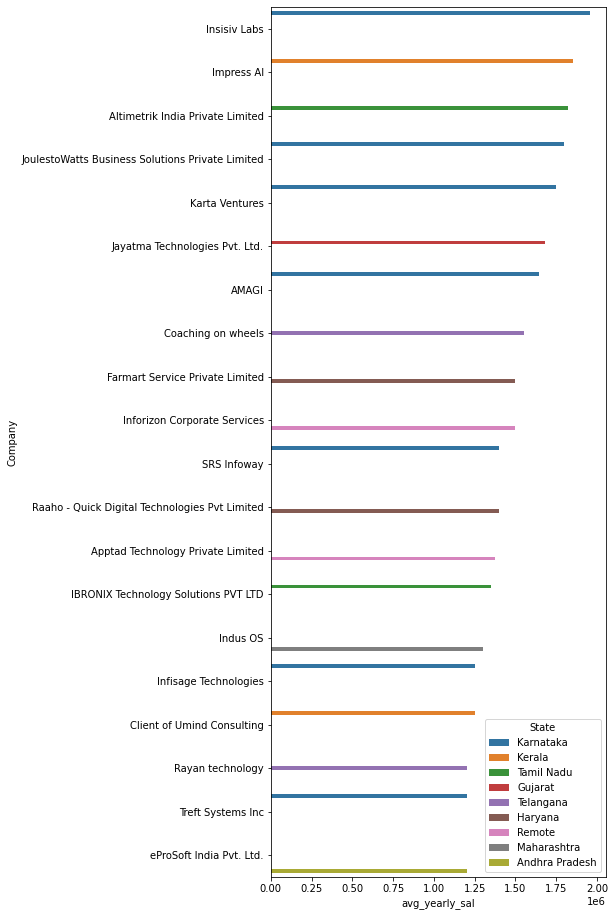

In [87]:
plt.figure(figsize=(6,16))
sns.barplot(y = 'Company', x = 'avg_yearly_sal', data=top_company_sal, ci=False, hue='State')

Looks like most of the high paying companies are based in Karnatka, followed by Delhi

<AxesSubplot:xlabel='avg_yearly_sal', ylabel='Company'>

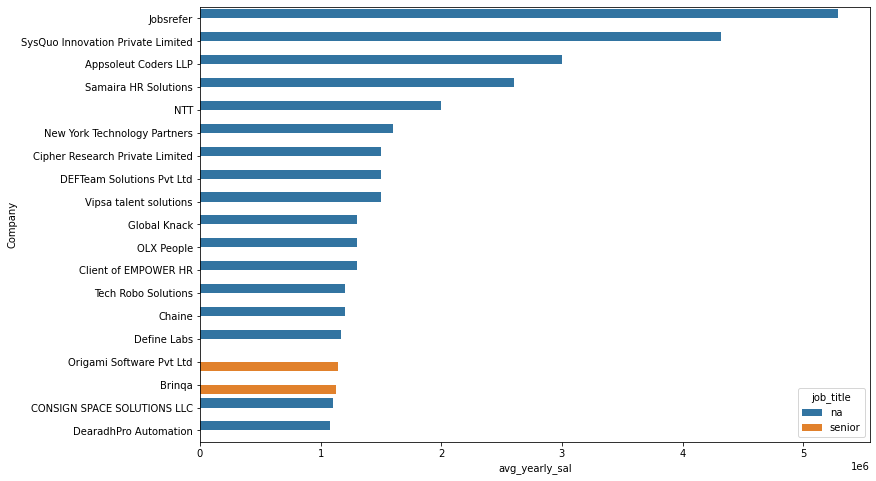

In [37]:
plt.figure(figsize=(12,8))
sns.barplot(y = 'Company', x = 'avg_yearly_sal', data=top_company_sal, hue='job_title', ci=False)

As expected Companies offer high paying salries to senior employees <br>
Looks like most of the missing <b>job_titles</b> for above companies are probably senior <br>
Suprisingly most of popular companies like Accenture, JP Morgan, Siemens etc. are nowhere near the top 

In [43]:
df_pivots = df[['python', 'stack', 'java', 'bootstrap', 'react', 'apis',
               'c', 'net', 'mvc', 'mobile', 'testing', 'sql', 'css', 'server',
               'database', 'html', 'ui', 'system', 'php', 'angular', 'systems', 'app',
               'javascript', 'rest', 'api', 'js', 'cleaning', 'algorithms',
               'architecture', 'information', 'jquery']]

Lets look at effect of skills on annual salary

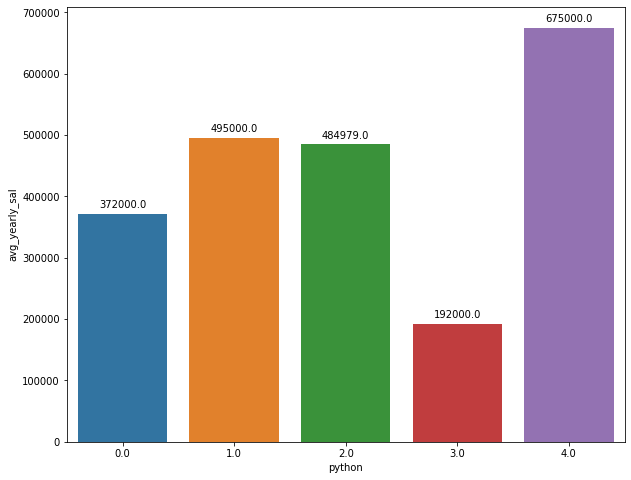

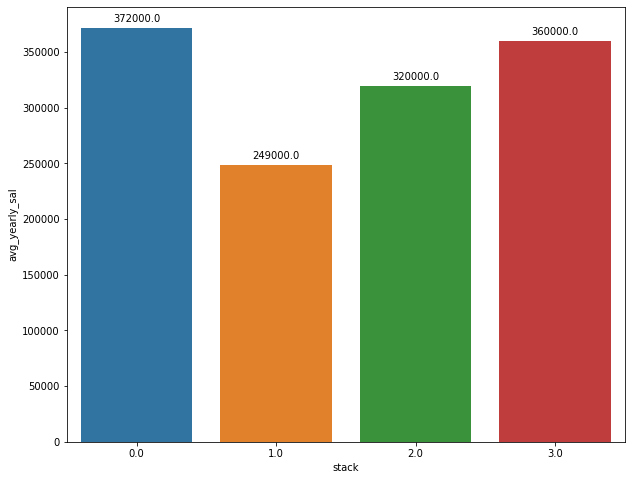

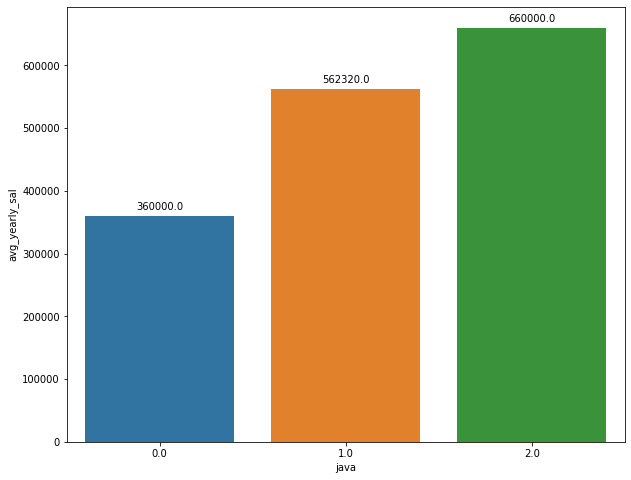

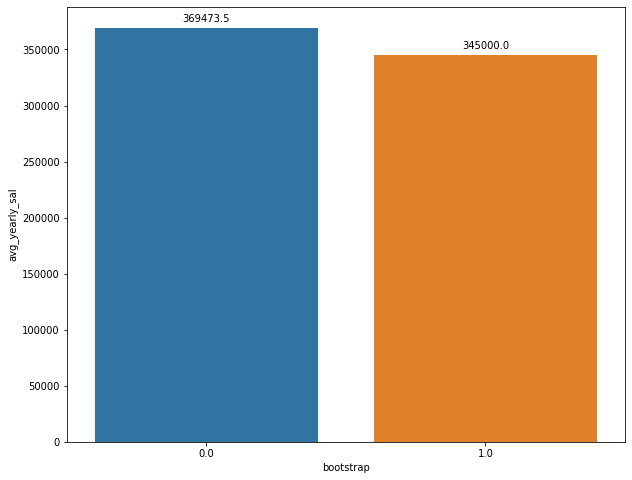

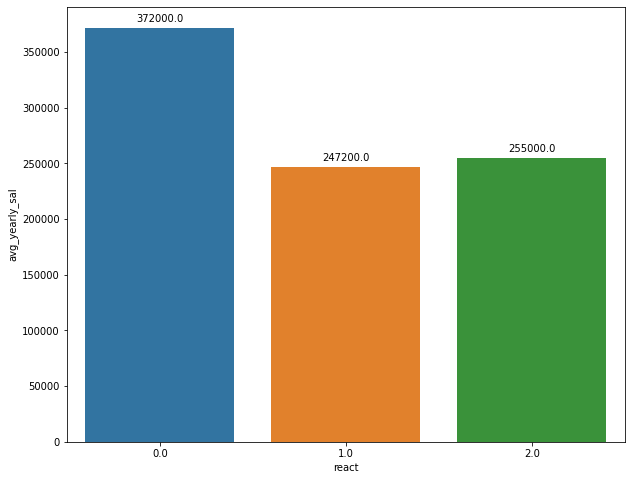

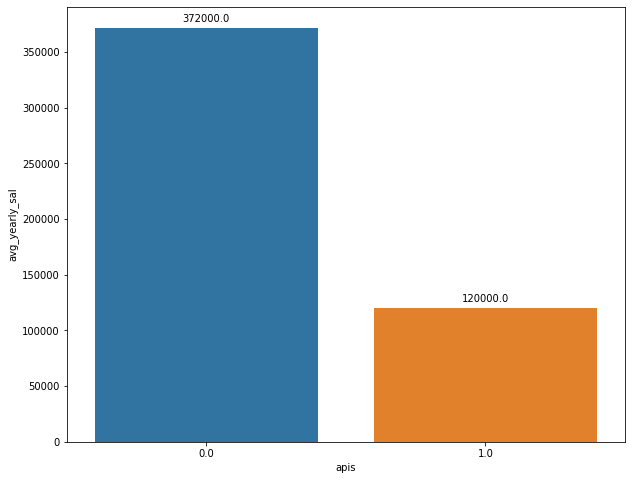

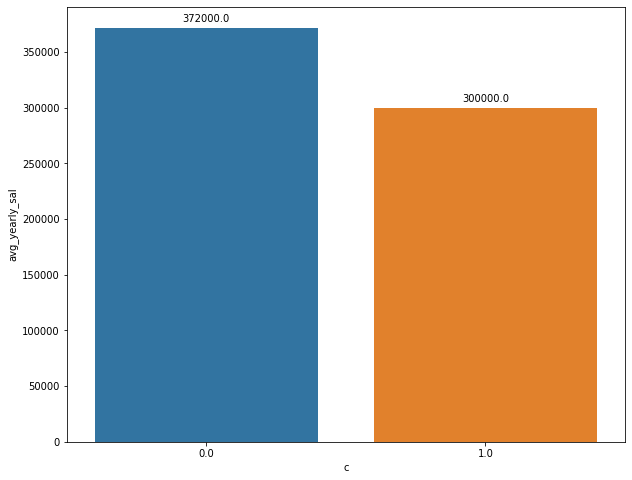

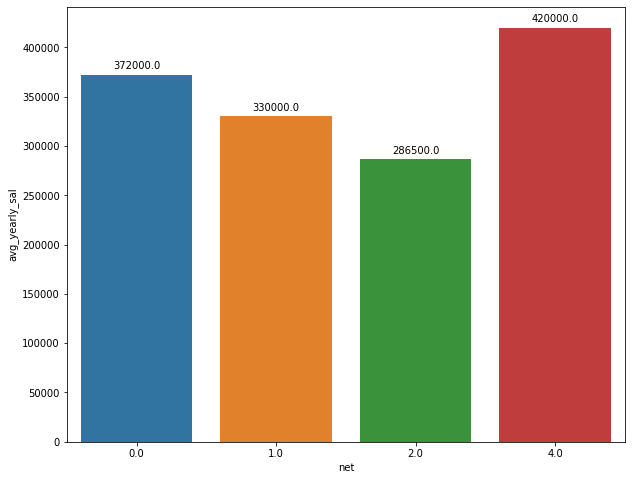

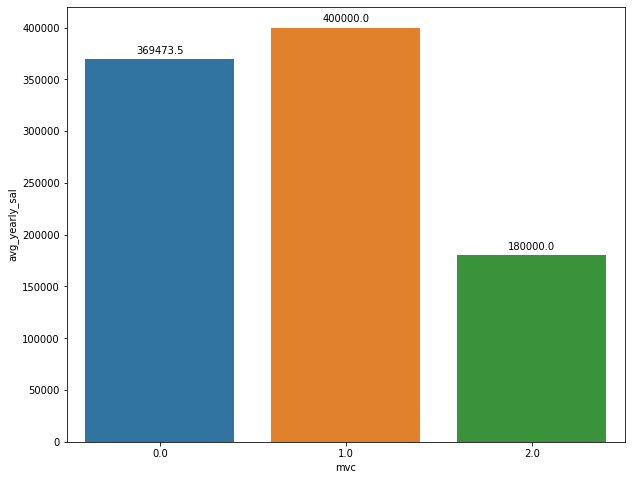

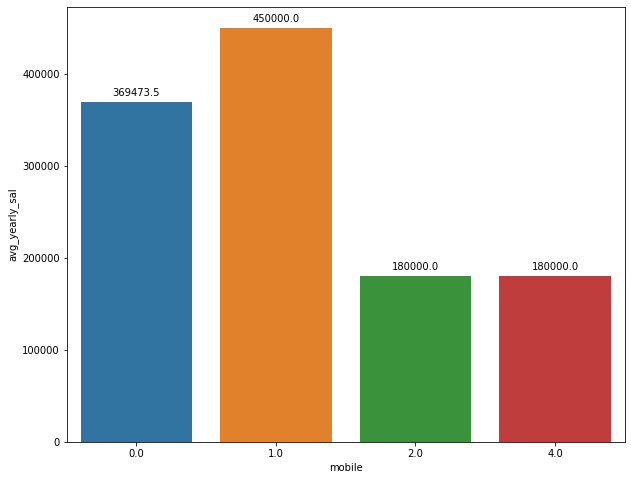

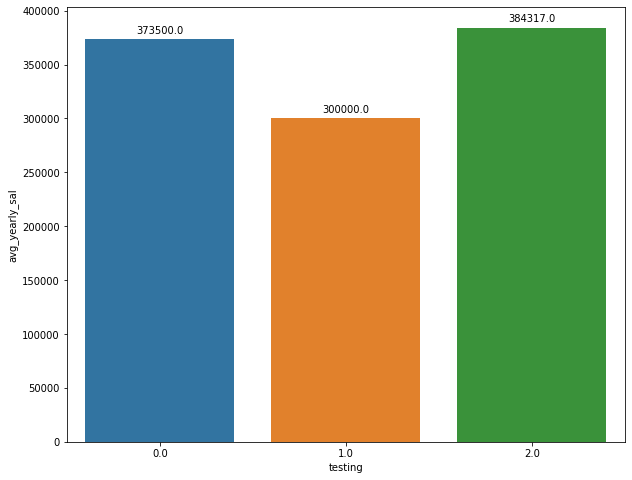

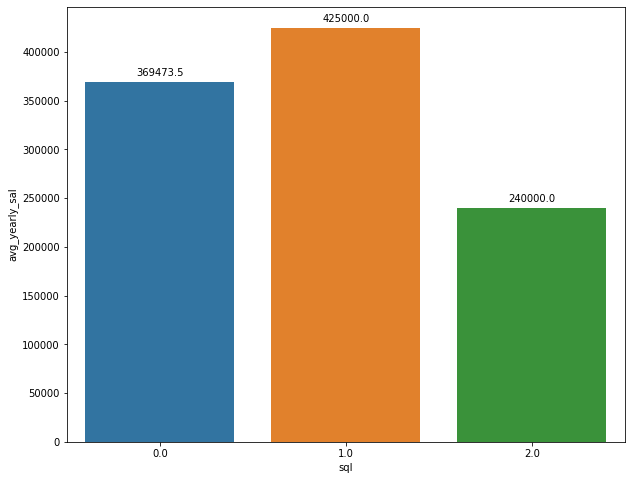

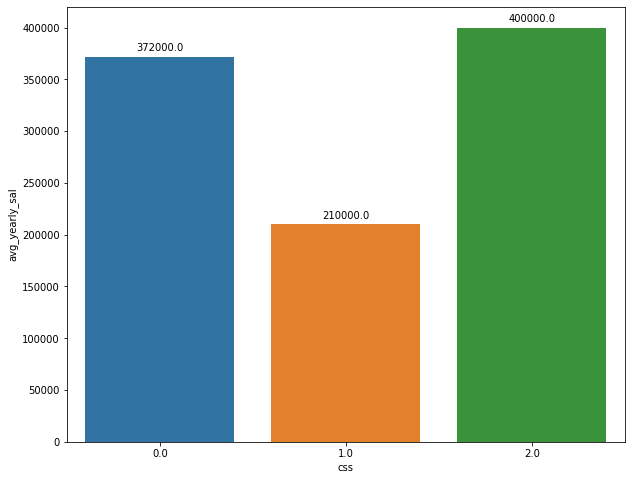

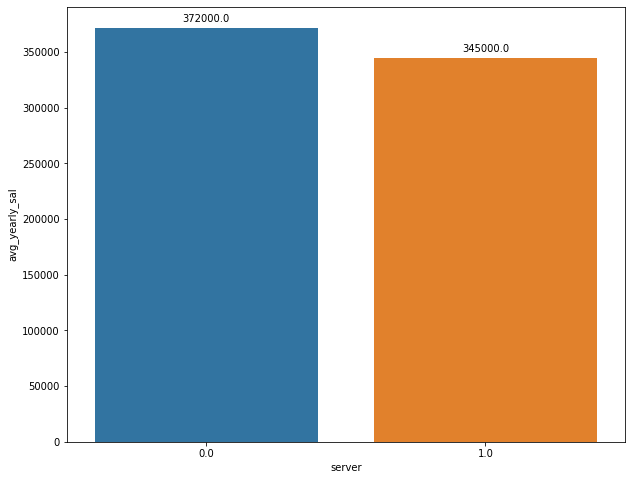

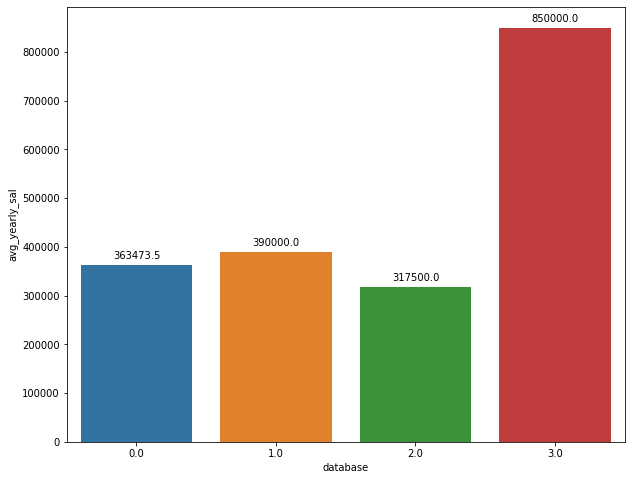

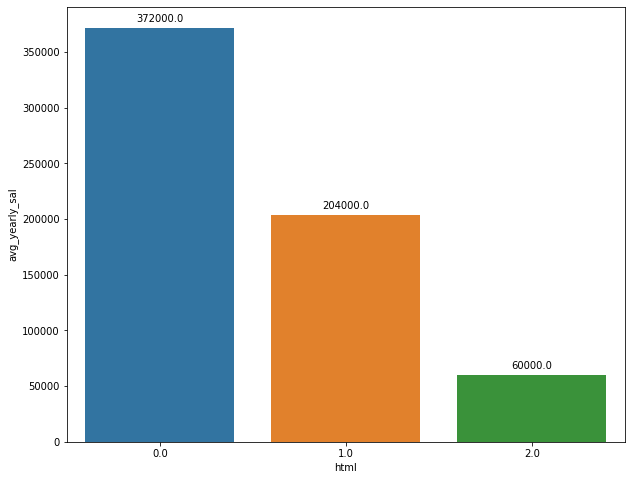

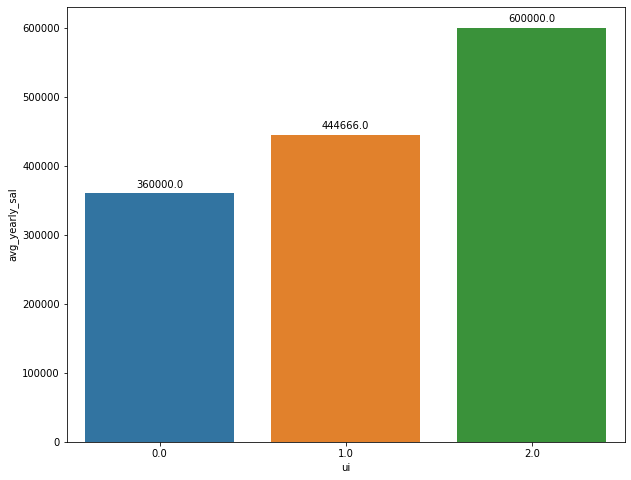

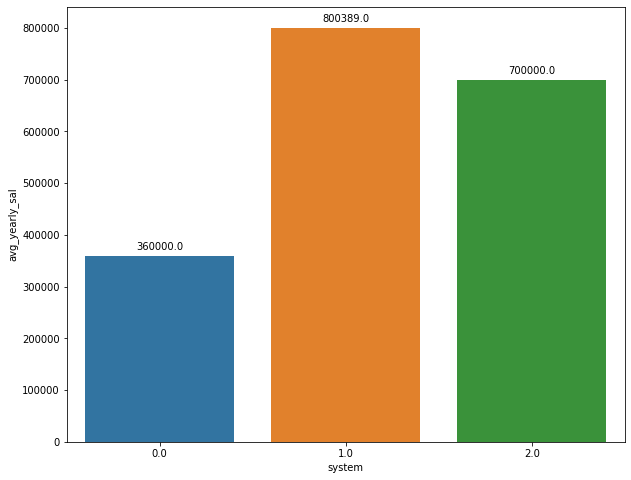

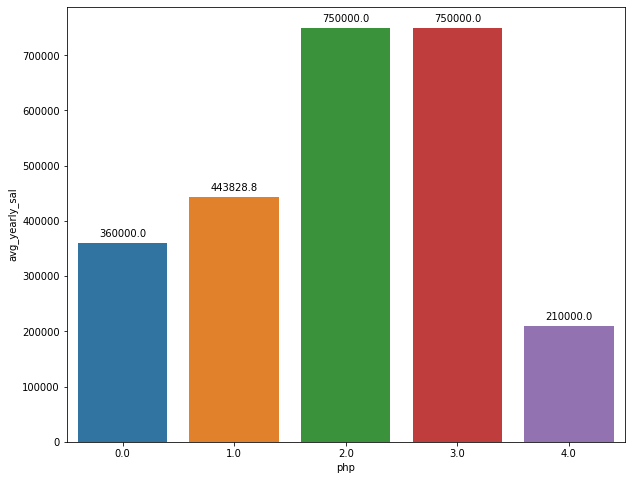

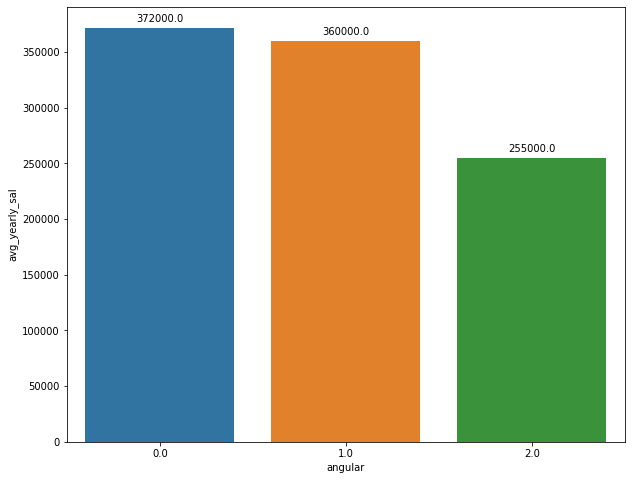

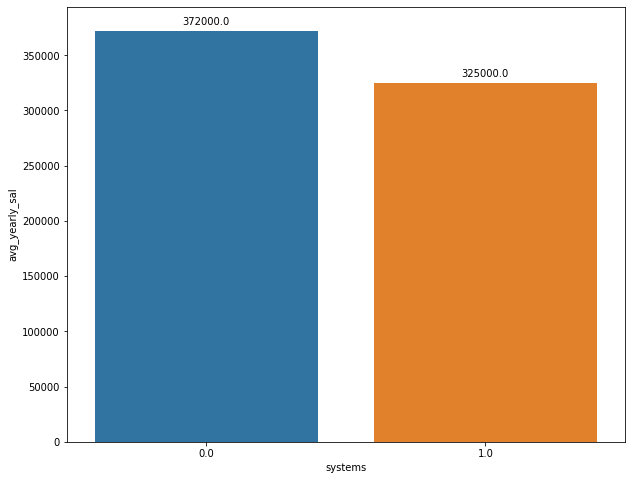

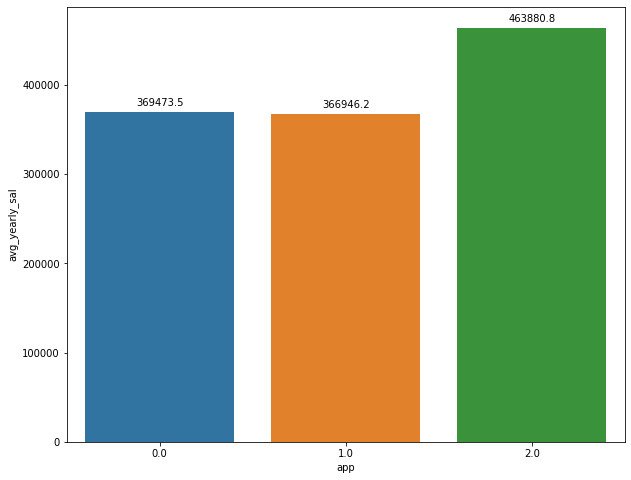

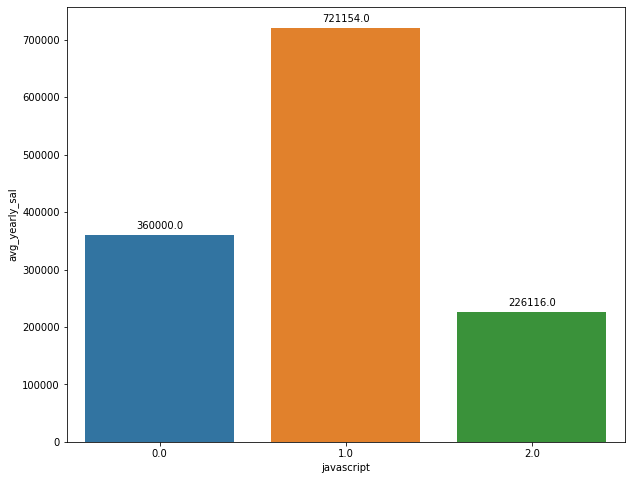

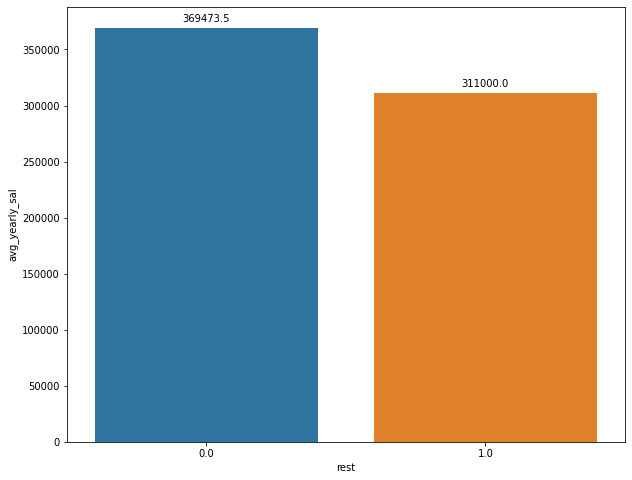

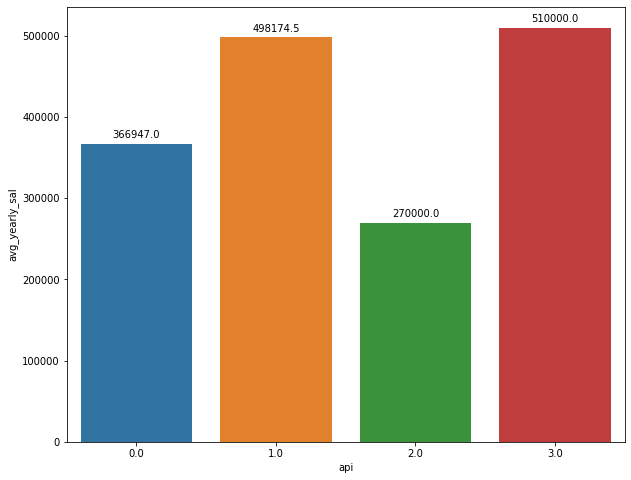

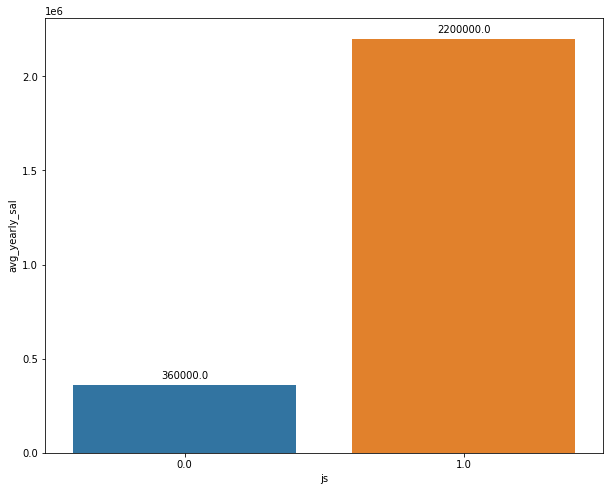

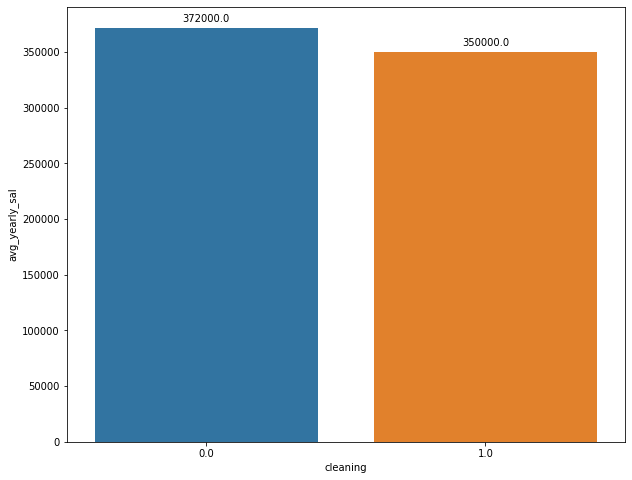

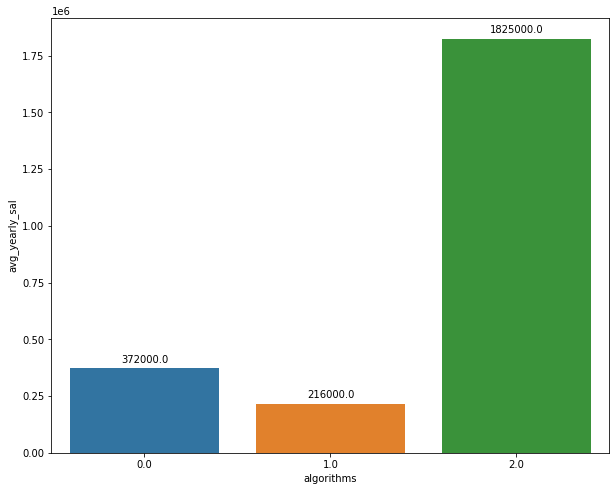

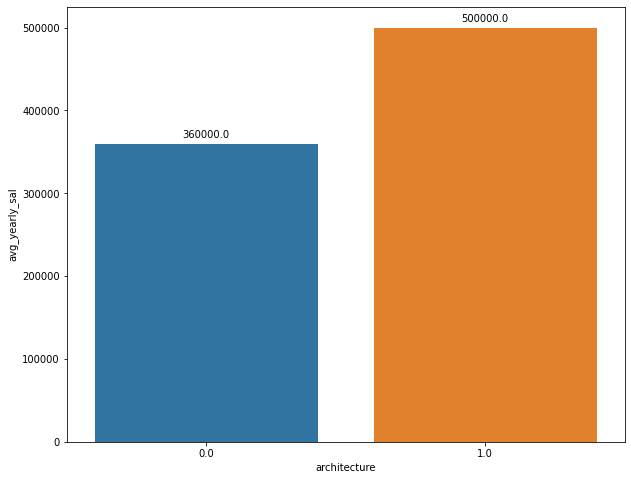

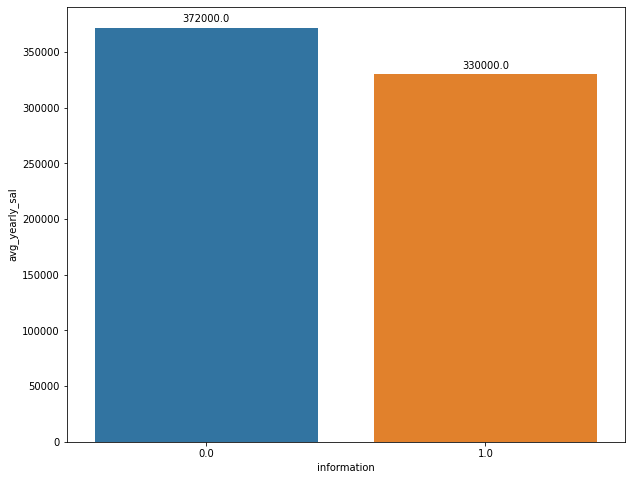

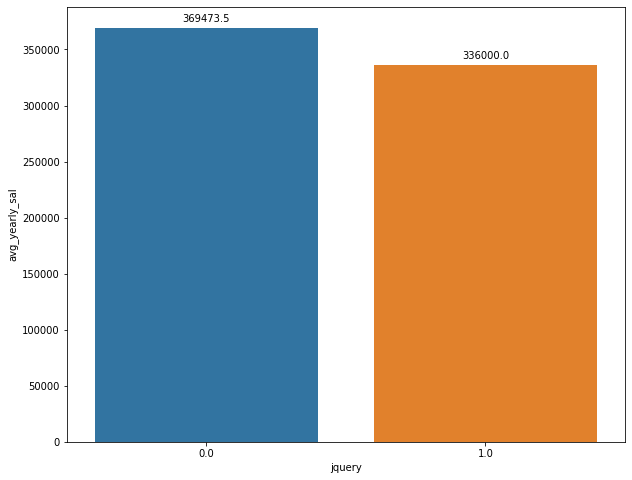

In [214]:
for i in df_pivots.columns:
    if i != 'avg_yearly_sal':
        splot = sns.barplot(x = i, y='avg_yearly_sal', data=df[df['avg_yearly_sal'] != 0], ci=False, estimator=np.median)  
        for p in splot.patches:
                   splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')    
        plt.show(block=False)                                         # So plot dont overwrite when print them 

<b>Skills for which companies pay higher : </b>  <br>
(i) redux, angular, stack, app, javascript, ai, rest, node.js, html, mobile, flutter, debugging, architecture, pwas, b2b, healthcare, security, typescript, iot, bootstrap, game, git  <br> <br>
Skills you must have in your cv   :)

<b>Skills for which companies pay less compared to other skills : </b>  <br>
(ii) .net, server, css, sql, testing, python, c++, php, ui, database, mvc, unity, mysql, graphic, apis, cloud, version, mongo, oops, restful, financial, jquery, word

(iii) Skills like java, ux, food, ios, aws are payed equally compared with others

In [ ]:
df.to_csv('./data_for_modelling.csv', index=False)